In [41]:
import jieba
import jieba.posseg as pseg
import matplotlib.pyplot as plt

from os import path
import sys

import re
import requests
from scipy.misc import imread
import time
from wordcloud import WordCloud

## 数据的获取
    1.1 利用 Requests 库的 get()函数爬取网页
    1.2 找到其中的新闻标题模式(正则)
    1.3 利用 re 模块中的 findall()函数提取出标题，将它们存入文件

In [42]:
def fetch_163_tech_news():
    # 使用正则匹配出新闻标题
    PATTERN = re.compile('.html">(.*?)</a></h3>')
    BASE_URL = "http://tech.163.com/special/it_2016"
    MAX_PAGE_NUM = 10

    with open('subjects.txt', 'w', encoding='utf-8') as f:
        # page1比较特殊 单独写入
        r_p1 = requests.get(BASE_URL)
        data_p1 = r_p1.text
        subject_p1 = re.findall(PATTERN, data_p1)
        for s_p1 in subject_p1:
            f.write(s_p1)
        # 余下的页面循环写入
        for i in range(2, MAX_PAGE_NUM):
            r = requests.get(BASE_URL + '_0' + str(i))
            data = r.text
            subjects = re.findall(PATTERN, data)
            for s in subjects:
                f.write(s)
            time.sleep(5)

## 标题分词(jieba) - 去除停用词 - 选择名词 - 根据词频画出词云

In [43]:
def extract_words():
    with open('subjects.txt', 'r', encoding='utf-8') as f:
        allSubjectsLine = f.readlines()
        
    hotWordLists = []
    
    # 设置停用词，存入set集合备用
    stop_words = set(line.strip() for line in open('stopwords.txt', encoding='utf-8'))
    
    for subject in allSubjectsLine:
        if subject.isspace():
            continue
        
        # 每一行使用jieba分词
        word_list = pseg.cut(subject)
        # flag选择"n"名词词性（"n"是名词，“a”是形容词，“v”是动词）
        for word, flag in word_list:
            # 去除停用词：单词若不在停用词中，且为名词，则加入列表中
            if not word in stop_words and flag == 'n':
                hotWordLists.append(word)
    content = ' '.join(hotWordLists) # 使用空格拼接 经过jieba分词后的hotWordLists中的 每一个词
    
    # 获得当前路径
    filedir = sys.path[0]
    dir = path.dirname(filedir)
    mask_image = imread(path.join(dir, "Paperplane.png")) # 读取所选用的遮罩图片
    
    # 设置词云属性（字体，背景颜色，词云形状，允许最大词汇）
    wordcloud = WordCloud(font_path='simhei.ttf',
                          background_color="black",
                          mask=mask_image, 
                          max_words=30)
    wordcloud.generate(content) # 产生词云
    
    # 显示生成的词云图
    plt.imshow(wordcloud)
    plt.axis("off")
    wordcloud.to_file('wordcloud.jpg') # 保存图片
    plt.show()

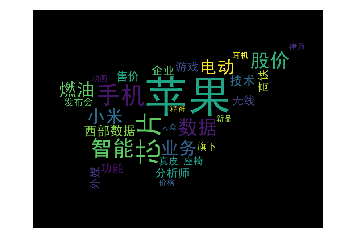

In [44]:
if __name__ == "__main__":
    fetch_163_tech_news()
    extract_words()